In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA

class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 5000):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
        '''
        self.alpha= alpha
        self.regLambda = regLambda
        self.regNorm = regNorm 
        self.epsilon = epsilon 
        self.maxNumIters = maxNumIters
        self.theta = None
        self.theta_final=   None
        self.hist= None 
        

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        n,d = X.shape
        if self.regNorm == 2 :
            cost = (-y.T * np.log(self.sigmoid(X*theta)) - (1.0-y).T* np.log( 1.0 - self.sigmoid(X*theta))) + (self.regLambda*(theta.T * theta)/ 2.0)  
        
        elif self.regNorm == 1 :
            cost = (-y.T * np.log(self.sigmoid(X*theta)) - (1.0-y).T* np.log( 1.0 - self.sigmoid(X*theta))) + (self.regLambda*(np.sum(theta))/ 2.0) 
            
        c= cost.item((0,0))
#        print(c)
#        
        return c

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        X = np.array(X)
        n,d = X.shape
        yhat = self.sigmoid(X* theta)
 
        if self.regNorm == 2 :
             gradient = (X.T * (yhat - y) ) + (regLambda*theta)
        else :
             gradient = (X.T* (yhat - y) ) + (regLambda *  (np.sign(np.array(theta))))  
            
        
        gradient[0] = sum(self.sigmoid(X*theta)- y )
        
#        print(gradient.shape)
        return gradient 

        

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        
        n,d = X.shape
        X = np.c_[np.ones((n,1)), X]

        self.theta=  np.matrix(np.random.randn((d+1))).T
        print(self.theta.shape)
        theta_updated = self.theta
        theta_old = self.theta
        j=0
        jp=[]
        self.hist=[]
        while j < self.maxNumIters:
            
            theta_updated = theta_old - (self.alpha* (self.computeGradient(self.theta, X, y, self.regLambda)))
           
            if (self.hasConverged(theta_old,theta_updated)):
                self.theta = theta_updated 
                
                break
            
            else :
                theta_old = theta_updated
                j=j+1
#                print(j)
                jp.append(j)
                cost = self.computeCost(theta_updated, X, y, self.regLambda)
                self.hist.append(cost)
#                print(cost)
                self.theta = theta_updated
                
       
    
        
    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        n,d= X.shape
#        print(self.theta)
        X = np.c_[np.ones((n,1)), X]

        y_pred=self.sigmoid(np.matmul(X,self.theta))

        
# making binary predictions
        for i in range(y_pred.shape[0]):
            if y_pred[i] > 0.5:
                y_pred[i] = 1
            else :
                y_pred[i]=0 
                
        return np.array(y_pred)

# convrting it to sigmmoid function 
    def sigmoid(self, Z):
        
        return 1.0/(1.0+np.exp(-Z))
    
# checks for convergence        
    def hasConverged(self,theta_old,theta_updated):
        '''
        checks for a n epsilon value
        '''
        n = theta_updated - theta_old
        if LA.norm(n) <= self.epsilon:
            return 1 
        else :
            return 0
            
            

In [6]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton
'''

import numpy as np
class LogisticRegressionAdagrad:

    def __init__(self, alpha = 0.0001, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 10):
        '''
        Constructor
        Arguments:
            alpha is the learning rate
            regLambda is the regularization parameter
            regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
            epsilon is the convergence parameter
            maxNumIters is the maximum number of iterations to run
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters =  maxNumIters
        self.JHist = None
        self.theta = None
        self.G = None
        
    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        yhat = self.sigmoid(X*theta)
        if (self.regNorm == 2):
            norm_term = (self.regLambda/2.0)* (theta.T*theta )
        else:
            norm_term = (self.regLambda/2.0)* (np.sum(theta))
        J = -(y.T*np.log(yhat)) - ((1.0-y).T*(np.log(1.0 - yhat))) + norm_term  
        J_scalar = J.item((0,0))
        return J_scalar
       
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        yhat = self.sigmoid(X*theta)
        gradient = (X.T* (yhat - y))
        # Account for regularization in theta
        if (self.regNorm == 2):
            for k in range(1,len(theta)):
                gradient[k]= gradient[k] + (regLambda*theta[k])
        else:
            for k in range(1,len(theta)):
                gradient[k]= gradient[k] + (regLambda*np.sign(theta[k]))
        gradient[0] = sum(yhat-y)
        return gradient
            
    def fit(self,X_train,X_test, y,y_test):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n,d = X_train.shape
        # Add bias to the feature space
        X_std = np.c_[np.ones((n,1)), X_train]
        # Intialize variables for regression
        self.theta = np.matrix(np.random.randn((d + 1))).T
        X_copy = X_std
        X_copy = np.c_[X_std,y]
        self.G = np.zeros((d+1,1))
        lc=[]
        for i in range(self.maxNumIters):
            np.random.shuffle(X_copy)
            X_sample = X_copy[:,0:d+1]
            y_sample = X_copy[:,-1]
            for k in range(n):   
                theta_old = self.theta
                X_new = X_sample[k].reshape(1,d+1)
                gradient = self.computeGradient(self.theta,X_new,y_sample[k], self.regLambda)
                # Adapt the alpha by the past values of gradient
                self.G = self.G + np.square(gradient)
                for k in range(0,len(gradient)):
                     self.theta = self.theta - (self.alpha * gradient/(np.sqrt(self.G[k]) + 1e-4))
                        
            if(i % 100 == 0):
                y_pred = self.predict(X_test)
                acc = accuracy_score(y_pred,y_test)
                lc.append((i,acc))
        return lc
            
    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        
        # Add bias to the feature space
        X_std = np.c_[np.ones((X.shape[0],1)),X]
        # Predict the labels
        yhat = self.sigmoid(X_std.dot(self.theta))
        for i in range(yhat.shape[0]):
            if (yhat[i] > 0.5):
                yhat[i] = 1
            else:
                yhat[i] = 0
        yhat = np.asarray(yhat)
        yhat = yhat.reshape((yhat.shape[0],1))
        return yhat
    
    def sigmoid(self,Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        return 1.0/(1.0 + np.exp(-Z))
    


In [7]:
######################################################################################################
"WDBC Data"
wb_data= pd.read_csv("data/wdbc.dat",sep = ",",header = None)

######################################################################################################
df1, df2, df3,df4,df5 = np.split(wb_data.iloc[:-4,:],5)
train_1 = pd.concat([df1,df2,df3,df4])
test_1 = df5
train_2 = pd.concat([df1,df2,df3,df5])
test_2 = df4
train_3 = pd.concat([df1,df2,df5,df4])
test_3 = df3
train_4 = pd.concat([df1,df5,df3,df4])
test_4 = df2
train_5 = pd.concat([df5,df2,df3,df4])
test_5 = df1

######################################################################################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X = wb_data.iloc[:,:-1]
# X = np.array(X, dtype="float64")
# y = np.array(wb_data[30],dtype=object)
# y = y.astype(str)
# for j in range(y.shape[0]):
#     if y[j] == 'M':
#         y[j] = 1
#     else:
#         y[j] = 0
# y = y.astype(int).reshape(y.shape[0],1)

clf1= LogisticRegressionAdagrad(maxNumIters = 1500, regLambda = 0.001)
clf2= LogisticRegressionAdagrad(maxNumIters = 1500, regLambda = 0.01)
# r1 = clf1.fit(X,y)
# x1= []
# y1=[]
# for i in range(len(r1)):
#     x1.append(r1[i][0])
#     y1.append(r1[i][1])
# plt.plot(x1,y1)

# y = y.astype(int).reshape(y.shape[0],1)
# r2 = clf2.fit(X,y)
# x2= []
# y2=[]
# for i in range(len(r2)):
#     x2.append(r2[i][0])
#     y2.append(r2[i][1])
# plt.plot(x2,y2)
# plt.show()
acc1 = []
acc2 = []
# accTrain = []
# #     for i in range(5):
train = [train_1,train_2,train_3,train_4,train_5]
test = [test_1,test_2,test_3,test_4,test_5]

for i in range(5):
    X_train = train[i].iloc[:,:-1]
    X_train = np.array(X_train, dtype="float64")
    y_train = np.array(train[i][30],dtype=object)
    y_train = y_train.astype(str)
    for j in range(y_train.shape[0]):
        if y_train[j] == 'M':
            y_train[j] = 1
        else:
            y_train[j] = 0
    y_train = y_train.astype(int)

    X_test = test[i].iloc[:,:-1]
    X_test = np.array(X_test, dtype="float64")
    y_test = np.array(test[i][30],dtype=object)
    y_test = y_test.astype(str)
    for j in range(y_test.shape[0]):
        if y_test[j] == 'M':
            y_test[j] = 1
        else:
            y_test[j] = 0
    y_test = y_test.astype(int)
    # Standardize the data
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train- mean) / std
    X_test = (X_test - mean)/std
    y_train = y_train.reshape(y_train.shape[0],1)
    y_test = y_test.reshape(y_test.shape[0],1)
    acc1 = clf1.fit(X_train, X_test,y_train,y_test)
    acc2 = clf2.fit(X_train, X_test,y_train,y_test)
   

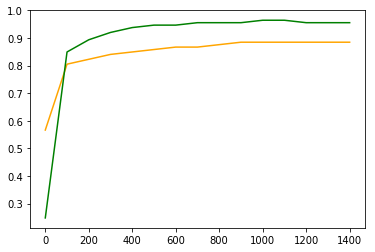

In [8]:
# plotting the learnign curves

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(len(acc1)):
    x1.append(acc1[i][0])
    y1.append(acc1[i][1])
plt.plot(x1,y1,'orange')
for i in range(len(acc2)):
    x2.append(acc2[i][0])
    y2.append(acc2[i][1])
plt.plot(x2,y2,'green')
plt.show()

In [20]:
######################################################################################################
"Retinopathy Data"
r_data = pd.read_csv("data/retinopathy.dat",sep = ",",header = None)

######################################################################################################

df1,df2,df3,df4,df5 = np.split(r_data.iloc[:-1,:],5)
train_1 = pd.concat([df1,df2,df3,df4])
test_1 = df5
train_2 = pd.concat([df1,df2,df3,df5])
test_2 = df4
train_3 = pd.concat([df1,df2,df5,df4])
test_3 = df3
train_4 = pd.concat([df1,df5,df3,df4])
test_4 = df2
train_5 = pd.concat([df5,df2,df3,df4])
test_5 = df1

######################################################################################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
C = 0.01  # value of C for the SVMs
# create an instance of SVM with the custom kernel and train it
clf = LogisticRegression(regNorm=2)

acc = []
# #     for i in range(5):
train = [train_1,train_2,train_3,train_4,train_5]
test = [test_1,test_2,test_3,test_4,test_5]

for i in range(5):
    X_train = train[i].iloc[:,:-1]
    X_train = np.array(X_train, dtype="float64")
    y_train = np.array(train[i][19],dtype=object)
    y_train = y_train.astype(int)
    X_test = test[i].iloc[:,:-1]
    X_test = np.array(X_test, dtype="float64")
    y_test = np.array(test[i][19],dtype=object)
    y_test = y_test.astype(int)
    # Standardize the data
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train- mean) / std
    X_test = (X_test - mean)/std
    y_train = y_train.reshape(y_train.shape[0],1)
    y_test = y_test.reshape(y_test.shape[0],1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
print(accuracy)

(20, 1)


C:\Users\Sailalitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


(20, 1)
(20, 1)
(20, 1)
(20, 1)
0.5956521739130435


In [15]:
######################################################################################################
"Diabetes Data"
d_data = pd.read_csv("data/diabetes.dat",sep = ",",header = None)

######################################################################################################

df1,df2,df3,df4,df5 = np.split(d_data.iloc[:-3,:],5)
train_1 = pd.concat([df1,df2,df3,df4])
test_1 = df5
train_2 = pd.concat([df1,df2,df3,df5])
test_2 = df4
train_3 = pd.concat([df1,df2,df5,df4])
test_3 = df3
train_4 = pd.concat([df1,df5,df3,df4])
test_4 = df2
train_5 = pd.concat([df5,df2,df3,df4])
test_5 = df1

######################################################################################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = LogisticRegression(regNorm=1)
acc = []
# #     for i in range(5):
train = [train_1,train_2,train_3,train_4,train_5]
test = [test_1,test_2,test_3,test_4,test_5]

for i in range(5):
    X_train = train[i].iloc[:,:-1]
    X_train = np.array(X_train, dtype="float64")
    y_train = np.array(train[i][8],dtype=object)
    y_train = y_train.astype(str)
    for j in range(y_train.shape[0]):
        if y_train[j] == 'tested_positive':
            y_train[j] = 1
        else:
            y_train[j] = 0
    y_train = y_train.astype(int)

    X_test = test[i].iloc[:,:-1]
    X_test = np.array(X_test, dtype="float64")
    y_test = np.array(test[i][8],dtype=object)
    y_test  = y_test.astype(str)
    for j in range(y_test.shape[0]):
        if y_test[j] == 'tested_positive':
            y_test[j] = 1
        else:
            y_test[j] = 0
    y_test = y_test.astype(int)
    # Standardize the data
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train- mean) / std
    X_test = (X_test - mean)/std
    y_train = y_train.reshape(y_train.shape[0],1)
    y_test = y_test.reshape(y_test.shape[0],1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
print(np.mean(acc))              

(9, 1)
(9, 1)
(9, 1)
(9, 1)
(9, 1)
0.7725490196078432


In [ ]:
###########################################################################################
"Learning Curve over different Models on retinopathy data"
###########################################################################################

n = [100,1000,2000,5000,10000]